# Teoria del Caos

Se busca observar como es el comportamiento de una partcula lanzada del origen hacia un dispersor en (0,y). Luego introducir los cuatros dispersores, y encerrar el sistema dentro de un circulo.

$$ a_{x}=\frac{2}{m}A(x-x_{1})\epsilon^{-\alpha((x-x_{1})^{2}+(y-y_{1})^{2})}) $$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as op

# Runge-Kutta

In [2]:
def rk4(f,xo,r,h):
    """Este es el integrador runge kutta de cuarto orden, regresa la derivada del vector dinámico,
    y arreglo de tiempo."""
    h2=0.1*h
    
    conteo=0; t=0 ; tiempo=[0]
    x=np.array([xo])
    while (x[-1][0]**2) + (x[-1][1]**2) < r**2:
        k1= h*f(x[-1])
        k2= h*f(x[-1]+0.5*k1)
        k3= h*f(x[-1]+0.5*k2)
        k4= h*f(x[-1]+k3)
        X= x[-1]+(k1+2*(k2+k3)+k4)/6
        x=np.vstack((x, X))
        
        conteo +=1; t+=h; tiempo=np.hstack((tiempo, t))
    
    """Condicional de impacto sobre el circulo de frontera"""
    
    if ((x[-1][0])**2) + ((x[-1][1])**2) > r**2:
        k1= h2*f(x[-2])
        k2= h2*f(x[-2]+0.5*k1)
        k3= h2*f(x[-2]+0.5*k2)
        k4= h2*f(x[-2]+k3)
        x[-1]= x[-2]+(k1+2*(k2+k3)+k4)/6

    return x, tiempo

In [69]:
def lanzamiento(Integrador, Masa, vel, Amplitud, Radio, xp, yp, alpha, h, Grafica=False):
    """Esta función genera el lanzamiento de una partícula"""
    m=Masa; v=vel; A=Amplitud; r=Radio
    
    # Condiciones iniciales de la particula
    xo=np.array([xp,yp]); vo=np.array([0, v])
    nu=np.array([xo[0],xo[1],0,vo[1]]) #Arreglo de posicion y velocidad inicial
    
    # Coordenadas de los potenciales dispersivos  
    x1, x2, x3, x4= 2, -2, -2, 2  #Coordenadas de los dispersores en x
    y1, y2, y3, y4= 2, 2, -2, -2  #Coordenadas de los dispersores en y
    
    #Derivada del vector dinámico, retorna (vx, vy, ax, ay)
    def dYdt(y):
        exp1 =(np.e**(-alpha*((y[0]-x1)**2 + (y[1]-y1)**2))); cte=(2/m)*alpha*A
        exp2= (np.e**(-alpha*((y[0]-x2)**2 + (y[1]-y2)**2)))
        exp3= (np.e**(-alpha*((y[0]-x3)**2 + (y[1]-y3)**2)))
        exp4= (np.e**(-alpha*((y[0]-x4)**2 + (y[1]-y4)**2)))
        return np.array([y[2], y[-1], cte*((y[0]-x1)*exp1 + (y[0]-x2)*exp2 + (y[0]-x3)*exp3 + (y[0]-x4)*exp4), cte*((y[1]-y1)*exp1 + (y[1]-y2)*exp2 + (y[1]-y3)*exp3 + (y[1]-y4)*exp4)])
    
    Y=rk4(dYdt, nu, r, h)[0]; tiempo=rk4(dYdt, nu, r, h)[1]
    vx=Y[-1][2]; vy=Y[-1][-1] #vx, vy= velocidad final en x e y respectivamente
    
    #Energia
    x=Y[:,0]; y=Y[:,1]; v_x=Y[:,2]; v_y=Y[:,-1] ; velocidad=np.sqrt((v_x)**2 + (v_y)**2)
    exp1 =(np.e**(-alpha*((x-x1)**2 + (y-y1)**2))); exp2= (np.e**(-alpha*((x-x2)**2 + (y-y2)**2)))
    exp3= (np.e**(-alpha*((x-x3)**2 + (y-y3)**2))); exp4= (np.e**(-alpha*((x-x4)**2 + (y-y4)**2)))
    K= 0.5*m*((velocidad)**2); V= A*(exp1 + exp2 + exp3 + exp4); ET= K+V
    
    """Devido que la función arcTan tiene """
    #Condición ángulo de salida y de impacto
    def angulo(vx,vy):
        theta=np.arctan(vy/vx)*180/(np.pi)-90 #ángulo de salida con respecto a la velocidad (en grados)
        theta1=np.arctan(Y[-1][1]/Y[-1][0])*180/(np.pi)-90 #Ángulo polar o de impacto con respecto a la posición (en grados)
        if vx>=0 and vy>=0:   #Primer cuadrante
            betha = theta
            alpha = theta1
        if vx<0 and vy >0:    #Segundo cuadrante
            betha = 180+theta
            alpha = 180+theta1
        if vx<0 and vy<0:     #Tercer cuadrante
            betha = 180 + theta
            alpha = 180 + theta1
        if vx>0 and vy<0:     #Cuarto cuadrante
            betha = theta
            alpha = theta1
        return betha, alpha
    Angulos=angulo(vx,vy)
    
    if Grafica!=False:
        x=np.linspace(-r,r,100)
        #Grafica del circulo, trayectoria y ubicación de los potenciales.
        plt.plot(x, np.sqrt(r**2-x**2), "g", x, -np.sqrt(r**2-x**2), "g", Y[:,0], Y[:,1], "--" ,0,0,"b.",  x1,y1,"r.", x2,y2,"r.", x3,y3, "r.", x4,y4,"r.")
        plt.xlabel("X",fontsize=15) ; plt.ylabel("Y",fontsize=15), plt.title("Trayectoria del tiro")
        plt.grid(); plt.show()
        #Grafica de la energia
        plt.plot(tiempo, ET, tiempo,K, "r", tiempo, V,"g"), plt.legend(("Energia Total","Cinetica","Pontencial")), plt.grid()
        plt.xlabel("Tiempo",fontsize=15) ; plt.ylabel("Energia",fontsize=15), plt.title("Energias vs tiempo"); plt.show()
        
    return Y,"Xf", Y[-1][0], "Yf:", Y[-1][1], "Vx:", Y[-1][2], "vy:", Y[-1][-1], "Ángulo de salida:",  Angulos[0], "Ángulo polar:",Angulos[1], "Tiempo:",len(tiempo), tiempo

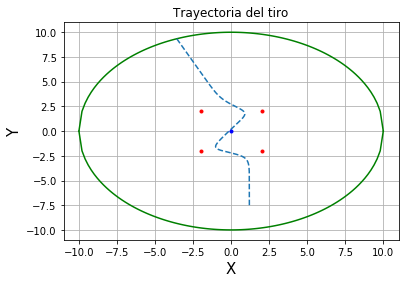

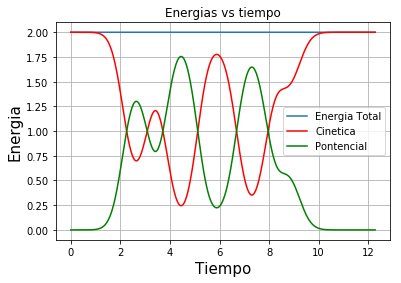

(array([[ 1.20000000e+00, -7.50000000e+00,  0.00000000e+00,
          2.00000000e+00],
        [ 1.20000000e+00, -7.48000000e+00, -4.80918211e-09,
          1.99999997e+00],
        [ 1.20000000e+00, -7.46000000e+00, -1.01754001e-08,
          1.99999993e+00],
        ...,
        [-3.55716213e+00,  9.31479088e+00, -8.38978075e-01,
          1.81552113e+00],
        [-3.56555191e+00,  9.33294609e+00, -8.38978075e-01,
          1.81552113e+00],
        [-3.56639089e+00,  9.33476161e+00, -8.38978075e-01,
          1.81552113e+00]]),
 'Xf',
 -3.566390892914825,
 'Yf:',
 9.334761609475706,
 'Vx:',
 -0.8389780747338049,
 'vy:',
 1.8155211306354844,
 'Ángulo de salida:',
 24.802328564769027,
 'Ángulo polar:',
 20.909599034919268,
 'Tiempo:',
 1229,
 array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.226e+01, 1.227e+01,
        1.228e+01]))

In [74]:
lanzamiento(rk4, 1, 2, 3, 10, 1.2, -7.5, 0.5, 1e-2,1)

## Parámetro de impacto vs ángulo de la impacto

In [75]:
def Parametro_impacto(xp, vel, n, barras, Grafica=False):
    """Esta función halla los ángulos de impacto para cada lanzamiento, 
    hallando la sección eficaz (histograma)"""
    
    angulo_impacto=[]; xp=np.linspace(-xp,xp, n)
    for i in range(n):
        x=lanzamiento(rk4, 1, vel, 3, 10, xp[i], -7.5, 0.5, 1e-2, 0)[-4] #angulo de impacto
        angulo_impacto=np.hstack((angulo_impacto, x)) #arreglo de los angulos de impacto
    
    if Grafica!=False:
        plt.plot(xp, angulo_impacto)
        plt.xlabel("X",fontsize=15),  plt.ylabel("Angulo de impacto",fontsize=15), plt.grid(); plt.show()
        
        plt.hist(angulo_impacto , barras)
        plt.xlabel("Ángulode impacto",fontsize=15),  plt.ylabel("Número de tiros",fontsize=15), plt.title("Distribución ángulo de impacto",fontsize=15); plt.show()
    return

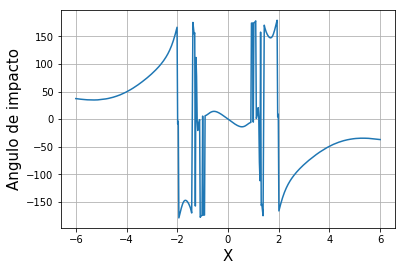

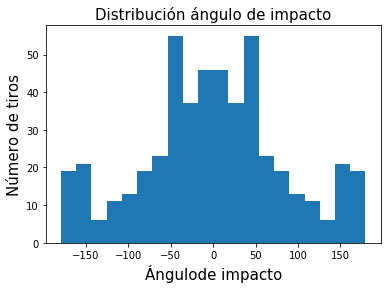

In [76]:
Parametro_impacto(6, 2, 500, 20, 1)

## Coeficiente de Lyapunov

In [52]:
def Lyapunov(xp, vel, delta, q, Grafica=False):
    
    x1=lanzamiento(rk4, 1, vel, 3, 10, xp, -7.5, 0.5, 1e-2,0)  #Lanzamiento de la primera partícula
    x2=lanzamiento(rk4, 1, vel, 3, 10, xp+delta, -7.5, 0.5, 1e-2,0)  #Lanzamiento de la segunda con un delta
    t1=x1[-2]; t2=x2[-2]  # t1=tiempo de la primera partícula, t2=tiempo de la segunda partícula
    
    #Condicional para que las dos trayectorias tengan el mismo tiempo
    if t1<t2:
        p1=x1[0]; p2=x2[0][:t1]; t=x1[-1]
    if t2<t1:
        p1=x1[0][:t2]; p2=x2[0]; t=x2[-1]
    if t1==t2:
        p1=x1[0]; p2=x2[0]; t=x1[-1]
    
    # Diferencia entre las trayectorias
    dx=p1[:,0]-p2[:,0]; dy=p1[:,1]-p2[:,1]; dr=np.sqrt((dx**2)+(dy**2))
    
    #Fiteo
    def f(t, A, landa): return A*np.e**(landa*t)  #La primera columna es A, la segunda lambda
    
    """Se analisa la trayectoria por secciones y así calcular el coeficiente de Lyapunov, 
    donde q=número de secciones que quiero analisar"""
    coeficientes=[0,0]; n=int(len(t)/q)
    for i in range(n):
        delta_posicion= dr[i*q : q*(i+1)]
        delta_tiempo= t[i*q : q*(i+1)]
        datos_fit= op.curve_fit(f, delta_tiempo, delta_posicion)
        coeficientes=np.vstack((coeficientes, datos_fit[0]))
    
    landa=coeficientes[:,1]; Amplitud=coeficientes[:,0]
    
    #Grafica
    if Grafica!=False:
        plt.plot(t, dr)
        plt.xlabel("Tiempo",fontsize=15),  plt.ylabel("Delta de posicion",fontsize=15), plt.title("Diferencia de trayectoria",fontsize=15)
        plt.grid(); plt.show()
        
        
    return coeficientes, landa.max()

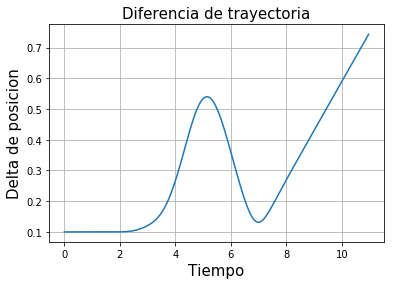

1.0545279245519066

In [71]:
Lyapunov(1, 2, 0.1, 20, 1)[1]

## Región caotica

In [61]:
def Region_caos(xp, vel, n, delta, q):
    landas=[]; xp=np.linspace(-xp,xp, n)
    for i in range(n):
        x=Lyapunov(xp[i], vel, delta, q, 0)[1]
        landas=np.hstack((landas, x))
    plt.plot(xp, landas)
    plt.xlabel("X",fontsize=15),  plt.ylabel("Coeficiente Lyapunov",fontsize=15), plt.title("Región caotica",fontsize=15)
    plt.grid(); plt.show()
    return landas

C:\Users\Bandera\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Bandera\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


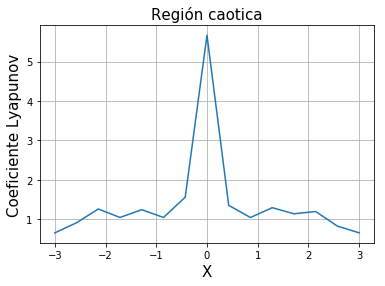

array([0.65729557, 0.9145966 , 1.26370151, 1.04889687, 1.24617058,
       1.04891675, 1.56370607, 5.66789206, 1.35592994, 1.04762083,
       1.29731355, 1.141867  , 1.20013791, 0.82932716, 0.65982777])

In [62]:
Region_caos(3, 2, 15, 0.1, 20)